# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [2]:
import os

os.chdir("/Users/hunter/Desktop/QBIO_490_HunterN/analysis_data")

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the one of interest (BRCA in our case).
4. Load it into our python environment.

In [14]:
# 1. Import cptac
import cptac



# 2. Examine the data sets available with list_datasets()
datasets = cptac.list_datasets()
print(datasets)

                                           Description     Data reuse status  \
Dataset name                                                                   
Brca                                     breast cancer       no restrictions   
Ccrcc         clear cell renal cell carcinoma (kidney)       no restrictions   
Colon                                colorectal cancer       no restrictions   
Endometrial            endometrial carcinoma (uterine)       no restrictions   
Gbm                                       glioblastoma       no restrictions   
Hnscc            head and neck squamous cell carcinoma       no restrictions   
Lscc                      lung squamous cell carcinoma       no restrictions   
Luad                               lung adenocarcinoma       no restrictions   
Ovarian               high grade serous ovarian cancer       no restrictions   
Pdac                  pancreatic ductal adenocarcinoma       no restrictions   
UcecConf            endometrial confirma

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.5. Please run 'pip install --upgrade cptac' to update it. (/Users/hunter/anaconda3/lib/python3.11/threading.py, line 975)


In [15]:
# 3. Download the breast cancer data set -- fill in dataset!
cptac.download(dataset="BRCA")

# 4. Load the breast cancer data set
brca = cptac.Brca()

Now, we have our brca object containing a bunch of data. We can use the list_data() function the data available for the breast cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the brca object to examine the different data contained in the brca object. Much like calling functions from a package, we can use the brca.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [18]:
# Run the list_data() function
brca.list_data()
patient_data = cptac.brca("patient")
#around 100 patients in the data set

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


TypeError: 'module' object is not callable

**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [20]:
protein_data = brca.get_proteomics() # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [21]:
import numpy as np
import pandas as pd

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?
* What do the rows and columns represent?
* How many patients are there?
* What about proteins?

In [26]:
print(protein_data.axes)
print(protein_data.index)
print(protein_data.columns)

[Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122), Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)]
Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122)
Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1',

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [ ]:
protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

anything negative would represent lower relative expression, while positive numbers would represent higher relative expression.


**Exericse 2.4**

Print the relative fold change of patient `X01BR008` in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [28]:
## write code here
log2FC = protein_data.loc["X01BR008","TP53"]

### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [ ]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

In [ ]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

In [ ]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

In [ ]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [47]:
import pandas as pd
import numpy as np

tp53_mask = (protein_data.columns == "TP53") & (protein_data >= 1).any()

high_TP53 = protein_data.loc[:, tp53_mask]

num_patients = high_TP53.shape[0]

high_TP53["ARF1_Expression"] = "Average"

arf1_mask = (protein_data.columns == "ARF1") & (protein_data >= 1).any()

high_arf1_patients = np.any(protein_data.loc[:, arf1_mask], axis=1)

high_TP53.loc[high_arf1_patients, "ARF1_Expression"] = "High"

high_TP53_and_arf1 = high_TP53[high_TP53["ARF1_Expression"] == "High"]

print("Number of patients in high TP53:", num_patients)
print("Number of patients with high TP53 and average ARF1:", len(high_TP53_and_arf1))
#Axis that is representing proteins is columns

Number of patients in high TP53: 122
Number of patients with high TP53 and average ARF1: 122


/var/folders/rw/q82gzvv96n9381xcd32rp9w40000gn/T/ipykernel_87850/595099341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_TP53["ARF1_Expression"] = "Average"


## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the brca object. The function name is very similar in syntax to the get_proteomics() function from before!

In [62]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [63]:
# explore the data frames using shape, axes, and other functions we've gone over.
print("RNA Data (Transcriptomics):")
print(rna_data.head())

print("\nClinical Data:")
print(clinical_data.head())

print("\nDimensions of Data Frames:")
print("High_TP53 Shape:", high_TP53.shape)
print("RNA Data Shape:", rna_data.shape)
print("Clinical Data Shape:", clinical_data.shape)

#The values represent

RNA Data (Transcriptomics):
Name          A1BG  A1BG-AS1  A1CF     A2M   A2ML1   A2MP1  A3GALT2  A4GALT  \
Patient_ID                                                                    
CPT000814   1.9265    2.4267   NaN  5.3718  3.6437 -4.5301  -5.2608  0.6260   
CPT001846   3.6578    2.6524   NaN  5.3253 -5.1069 -0.7692   5.6915  3.2060   
X01BR001    0.9896    2.6363   NaN  5.4734 -1.5052 -2.0918      NaN  1.8816   
X01BR008    0.5535    2.2119   NaN  5.8701  3.2708 -1.9902  -5.0414  0.6957   
X01BR009    2.8359    3.3449   NaN  6.9307  2.6488 -3.1664      NaN  1.9784   

Name         A4GNT    AAAS  ...  ZWILCH   ZWINT    ZXDA    ZXDB    ZXDC  \
Patient_ID                  ...                                           
CPT000814      NaN  4.7000  ...  3.2268  5.1482 -0.0202  0.9270  5.1699   
CPT001846      NaN  4.3115  ...  3.2532  3.9191 -1.4924 -0.3262  3.2163   
X01BR001       NaN  3.3434  ...  1.9491  2.2365  0.1694  1.3074  2.8806   
X01BR008       NaN  4.3095  ...  3.1575  5.

The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [84]:
age_mask = clinical_data['Age'] > 50

masked_clinical = clinical_data[age_mask]

print("Masked Clinical Data for Patients Older Than 50:")
print(masked_clinical.head())

Masked Clinical Data for Patients Older Than 50:
Name       Replicate_Measurement_IDs Sample_Tumor_Normal TMT.Plex TMT.Channel  \
Patient_ID                                                                      
X01BR001                    X01BR001               Tumor        2        129N   
X01BR018                    X01BR018               Tumor        7        129N   
X01BR025                    X01BR025               Tumor        9        127N   
X01BR027                    X01BR027               Tumor        3        127N   
X01BR030                    X01BR030               Tumor        7        128C   

Name             Stage  Ischemia.Time.in.Minutes  PAM50 NMF.Cluster  \
Patient_ID                                                            
X01BR001     Stage IIB                       0.0  Basal     Basal-I   
X01BR018    Stage IIIA                       1.0  Basal     Basal-I   
X01BR025    Stage IIIA                       6.0   LumA      LumB-I   
X01BR027     Stage IIA      

Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [85]:
protein_ids = protein_data.index
rna_ids = rna_data.index
masked_clinical_ids = masked_clinical.index

name_intersects = [
    np.intersect1d(protein_ids, rna_ids),
    np.intersect1d(protein_ids, masked_clinical_ids),
    np.intersect1d(rna_ids, masked_clinical_ids)
]

data_frames = [protein_data, rna_data, masked_clinical]
for i, intersection in enumerate(name_intersects):
    length = len(intersection)
    df_name = data_frames[i]
    num_rows = df_name.shape[0]
    print(f"The length of {df_name} is {length}. Number of rows: {num_rows}")

for i, intersection in enumerate(name_intersects):
    if len(intersection) == num_rows:
        print(f"Intersection {i} contains data for all three levels.")

    
# 3. Which comparison(s) contain the patient names that have all three levels?
#Protein and RNA data, and rna and masked clinical data

The length of Name          A1BG     A2M   A2ML1    AAAS    AACS   AADAT   AAED1   AAGAB  \
Patient_ID                                                                   
CPT000814  -0.6712 -0.2075  2.7959  1.3969 -1.0899     NaN  1.6708 -0.3484   
CPT001846   1.3964  1.3302 -5.0948  0.7674 -1.6845     NaN  2.1022 -0.5814   
X01BR001    2.0219  1.6269 -3.2943  0.3352 -1.0739  1.2255  0.2754 -1.1187   
X01BR008   -0.5290  0.3267  1.4342  0.4938 -2.8676     NaN     NaN -1.0691   
X01BR009    1.2556  3.4489  2.8043 -0.2956 -1.7261     NaN     NaN -2.0471   
...            ...     ...     ...     ...     ...     ...     ...     ...   
X21BR001   -0.6610 -0.6402 -4.8578  1.2319 -1.6491     NaN     NaN -0.3074   
X21BR002   -1.3735  0.4227 -4.9553  0.6327 -3.1434     NaN     NaN  0.3071   
X21BR010    1.1583  0.3329 -5.7358 -0.1658 -2.0413 -1.2433  0.9090 -0.2410   
X22BR005    0.4948 -1.0986 -8.8314  0.2826 -1.0123 -2.5732  5.7567  1.7644   
X22BR006    0.5049 -0.6582 -7.4699  0.6570 -0.7239

## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [75]:
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [76]:
clinical_data['Age'] = clinical_data['Age.in.Month'] / 12
print(clinical_data[['Age.in.Month', 'Age']].head())

Name        Age.in.Month   Age
Patient_ID                    
CPT000814            NaN   NaN
CPT001846            NaN   NaN
X01BR001           660.0  55.0
X01BR008             NaN   NaN
X01BR009             NaN   NaN


There are actually control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [86]:
unique_sample_types = sorted(clinical_data['Sample_Tumor_Normal'].unique())

print("Unique Sample Types:", unique_sample_types)

Unique Sample Types: ['Tumor']


__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for soome of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

Old
Number of Old patients with Stage Stage IA: 2
Number of Old patients with Stage Stage IIA: 26
Number of Old patients with Stage Stage IIB: 7
Number of Old patients with Stage Stage III: 2
Number of Old patients with Stage Stage IIIA: 14
Number of Old patients with Stage Stage IIIB: 2
Number of Old patients with Stage Stage IIIC: 2
Young
Number of Young patients with Stage Stage IA: 2
Number of Young patients with Stage Stage IIA: 24
Number of Young patients with Stage Stage IIB: 13
Number of Young patients with Stage Stage III: 2
Number of Young patients with Stage Stage IIIA: 8
Number of Young patients with Stage Stage IIIB: 1
Number of Young patients with Stage Stage IIIC: 2


/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


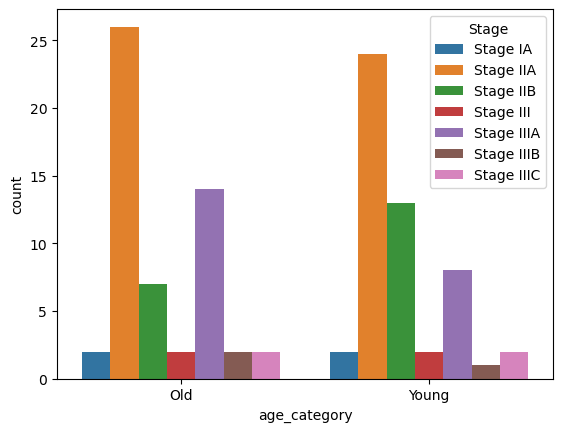

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

median_age = clinical_data['Age'].median()
clinical_data['age_category'] = np.where(clinical_data['Age'] <= median_age, 'Young', 'Old')

clinical_data = clinical_data[~clinical_data['Stage'].isna()]

stage_categories = np.unique(clinical_data.loc[:, 'Stage'])

for age_cat in ["Old", "Young"]:
    print(age_cat)
    for stage in stage_categories:
        # 1. Create a subset of the data frame with the old/young patients
        subset = clinical_data[clinical_data['age_category'] == age_cat]
        # 2. Count the number of patients with the stage of cancer and print
        count = len(subset[subset['Stage'] == stage])
        print(f"Number of {age_cat} patients with Stage {stage}: {count}")


sns.countplot(
    x="age_category",
    hue="Stage",
    hue_order=stage_categories,
    data=clinical_data
)

plt.show()


## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [94]:
young_mask = clinical_data['Age'] < median_age # the age column is 'Age.in.Month', which (as stated) is in months
old_mask = clinical_data['Age'] >= median_age

young = protein_data.loc[young_mask]
old = protein_data.loc[old_mask]

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

NameError: name 'data' is not defined

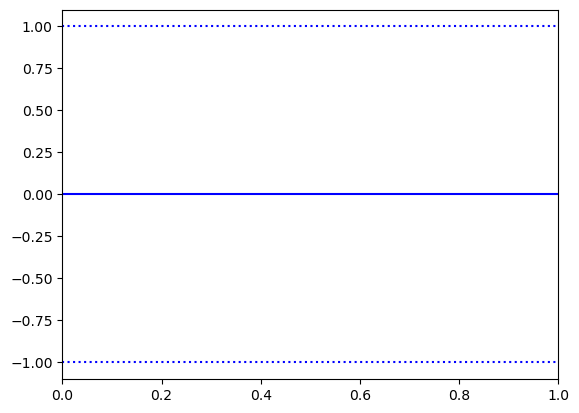

In [95]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(data) # data goes here
plt.xticks([1, 2], ["Old", "Young"]) # use \n for new line if desired


plt.show()

**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here
#These lines would represent the lower and higher relative expression at -1 and 1, respectively. And 0 would represent the reference.

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [96]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

Luckily for us, all 122 patients in the Brca dataset have clinical, transcriptomic, and proteomic data. If this were not the case (such as in the colon cancer database), we would use intersect1d() to fix this. We will still need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
2. Create the rna_shared and prot_shared data frames; ie dataframes with only genes that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [100]:
 
shared_rna_prot = np.intersect1d(rna_data.index, protein_data.index)


rna_shared = rna_data[shared_rna_prot]
prot_shared = protein_data[shared_rna_prot]

KeyError: "None of [Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',\n       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',\n       ...\n       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',\n       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],\n      dtype='object', name='Name', length=122)] are in the [columns]"

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [99]:

corr, pval = stats.spearmanr(rna_shared["MYC"], prot_shared["MYC"], nan_policy="omit")

print(f"The correlation of MYC is {round(corr, 3)} (p = {round(pval, 10)}).")

NameError: name 'rna_shared' is not defined

**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [ ]:
# answer in a comment here
#i'm not sure but a positive correlation between RNA and protein levels for a gene means positive increase for both if one increases.
#mathematically it means 1 means a positive relationship so both increase, -1 means both decrease, 0 means they both remain the same 

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [101]:
import seaborn as sns

In [105]:
ncomparisons = 20

gene_names = rna_data[:ncomparisons]

corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index=gene_names,
                      columns=gene_names)
for g1 in gene_names:
    for g2 in gene_names:
        # Calculate the correlations between protein and RNA (replace with your data)
        corr, _ = stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy="omit")
        # Store the correlation in corr_df
        corr_df.loc[g1, g2] = corr


plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

ValueError: Index data must be 1-dimensional

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


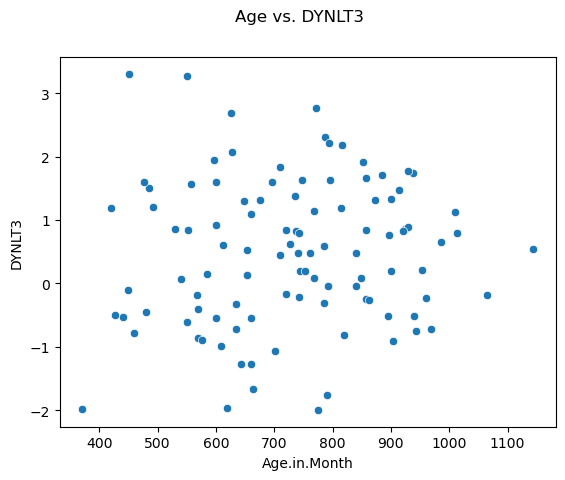

In [103]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

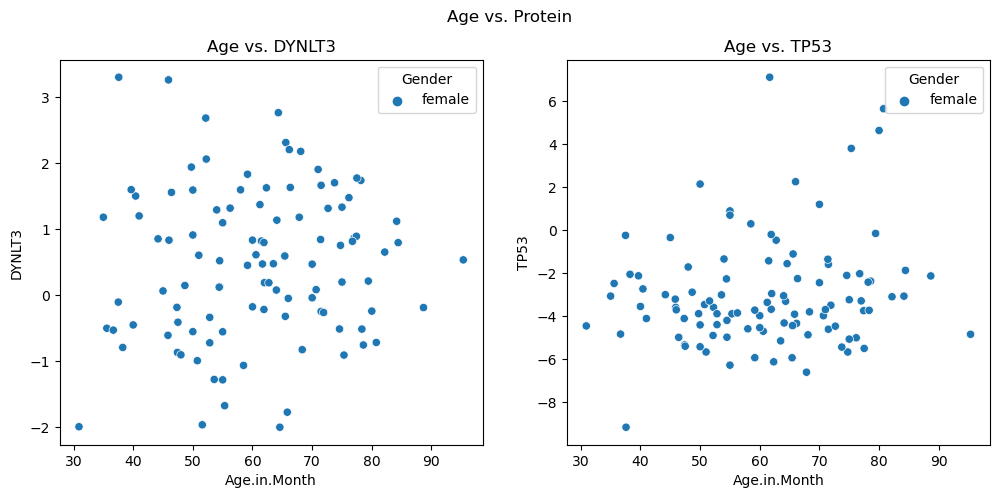

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


sns.scatterplot(
    x=clinical_data.loc[:, "Age.in.Month"] / 12,  # Age in years
    y=protein_data.loc[:, "DYNLT3"],
    hue=clinical_data.loc[:, "Gender"],  # Color by gender (or other clinical variable)
    legend="full",
    ax=ax1
)
ax1.set_title('Age vs. DYNLT3')

sns.scatterplot(
    x=clinical_data.loc[:, "Age.in.Month"] / 12,  # Age in years
    y=protein_data.loc[:, 'TP53'],
    hue=clinical_data.loc[:, "Gender"],  # Color by gender (or other clinical variable)
    legend="full",
    ax=ax2
)
ax2.set_title('Age vs. TP53')

fig.suptitle('Age vs. Protein')  # Set a common title for both subplots

plt.show()


## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hunter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


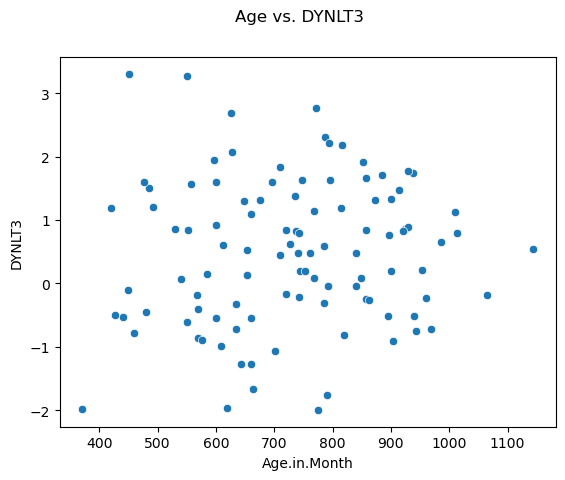

In [108]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot RNA expression versus protein expression for each of the genes in a different color.
4. Add appropriate legend, title, and labels.

Text(0.02, 0.5, 'Protein Log2 Fold Change')

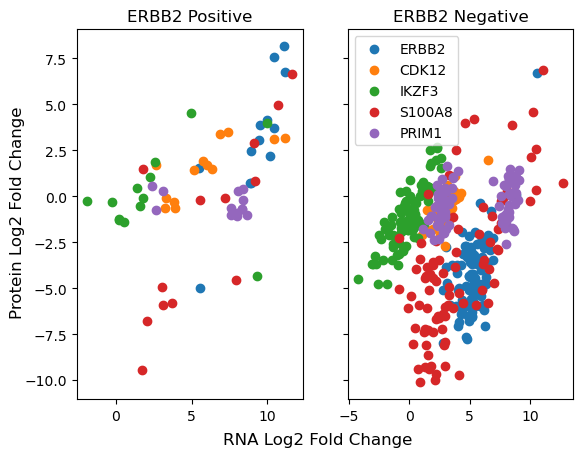

In [150]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()
na_mask = clinical_data.loc[:, 'ERBB2.Updated.Clinical.Status'].isna()
masked_clinical = clinical_data.loc[~na_mask, :]
masked_rna = rna_data.loc[~na_mask, :]
masked_protein = protein_data.loc[~na_mask, :]

gene_na_mask = masked_rna.isna().sum() == 0
masked_rna = masked_rna.loc[:, gene_na_mask]
protein_na_mask = masked_protein.isna().sum() == 0

masked_protein = masked_protein.loc[:, protein_na_mask]

pos_mask = masked_clinical.loc[:, 'ERBB2.Updated.Clinical.Status' ] == 'positive'
diff = masked_rna.loc[pos_mask, :].mean() - masked_rna.loc[-pos_mask, :].mean()
shared_mask = diff.index.isin(masked_protein.columns)


genes = diff[shared_mask].sort_values(ascending=False)[:5].index

fig, axs = plt.subplots(1, 2, sharey=True)
for gene in genes:
    axs[0].scatter(masked_rna.loc[pos_mask, gene], masked_protein.loc[pos_mask, gene], label=gene)
    axs[0].set_title('ERBB2 Positive')
for gene in genes:
    axs[1].scatter(masked_rna.loc[-pos_mask, gene], masked_protein.loc[-pos_mask, gene], label=gene) 
    axs[1].set_title('ERBB2 Negative')
plt.legend()
fig.supxlabel('RNA Log2 Fold Change')
fig.supylabel('Protein Log2 Fold Change')

## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
4. Why is proteomics data relatively scarce compared to sequencing data?
5. Should we ever expect protein expression to be 0 in a tumor sample?
6. What are protein domains and how do they relate to the role of a protein?
7. Overexpression of the ERBB2 gene is found in up to 20% of breast cancer cases. ERBB2 encodes the receptor tyrosine-protein kinase erbB-2, frequently called HER2 in humans. Thus, cases in which ERBB2 is overexpressed are referred to as HER2+. Briefly skim the following paper and answer the following questions. https://www.sciencedirect.com/science/article/pii/S1044579X20300493
>Is ERBB2 an oncogene or a tumor suppressor gene? How do mutations within the gene affect the prognosis of the disease?
<br></br>
>What are some treatment strategies for HER2+ breast cancer?
<br></br>
>What is one recent development that has changed our understanding of HER2+ breast cancer?

1. The numbers in the protein and transcriptomics dataframes represent expression levels measured for each protein in each sample. For transcriptomics it is typically FPKM, and for proteomics it is intensity values from mass spectrometry. Using quantitative values allows us to compare expression across samples.
2. There are fewer columns in the protein dataframe because proteomic technology currently can't measure as many proteins as sequencing can measure transcripts. RNA-seq routinely measures 20,000+ genes while proteomics may only evaluate a few thousand proteins.
3. Errors in transcription, RNA processing, translation, protein modification...etc can cause protein levels to not match RNA levels, complicating analyses that rely on correlation. Genes can also change their instructions which causes unexpected variations.
4. Proteomics data is more scarce primarily due to limitations in technology. Sequencing tech has outpaced mass spec-based proteomics in throughput. Also proteomes are more complex than genomes, and proteomics experiments may find more contamination or other substances due to the specificity.
5. We would not expect protein expression to be exactly 0 in a tumor sample, there should be at least a minimal amount of the protein present. Values of 0 will usually mean there's missing data.
6. Protein domains are functional subunits within a protein's amino acid sequence that carry out specific jobs. Understanding domains helps elucidate the mechanistic role of a protein.
7. ERBB2 is an oncogene, so the mutations that increase expression promote cancer. HER2+ breast cancer has worse prognosis but can be treated with HER2-targeted therapies, such as trastuzumab. A recent finding is that HER2 mutations may also occur and affect prognosis.

## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the BRCA somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.

In [114]:
brca.get_somatic_mutation().head()

Name,Gene,Mutation,Location
Patient_ID,,,
CPT000814,ABCG8,Missense_Mutation,p.V660L
CPT000814,ACTRT1,Missense_Mutation,p.S138F
CPT000814,ADA,Missense_Mutation,p.A73T
CPT000814,AHCTF1,Frame_Shift_Del,p.I1012Sfs*9
CPT000814,ANGPTL4,Silent,p.C341C


## 4. Challenge Exercise - Background Research
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
PAM50 is a breast cancer model based on clustering of breast cancer subtypes by expression of 50 selected genes. Our clinical data contains PAM50 subtypes for every patient.

You can read about the methodology more here:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2667820/

Using the CPTAC dataset, recreate one of the findings present in the paper. Create some form of figure to present your finding. In comments below, state your conclusion from the figure and whether it is supported by the paper above.

In [ ]:
# write code here